<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S6_2_Tabular_data_with_FastAI_SOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabular Data with FastAI 

Le Deep Learning s'applique parfois bien aux datasets que nous avons l'habitude de traiter. Leur vrai avantage est de nous éviter beaucoup de préprocessing. Voyons cela avec le dataset d'IBM



1. Importez la librairie ```fastai.tabular```

In [0]:
from fastai.tabular import *

2. Importez le dataset IBM HR Attrition.csv et stockez le dans un DataFrame 

In [0]:
import pandas as pd
dataset = pd.read_csv("https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_12_WEEK_PROGRAM/master/S0.6%20--%20Deep%20Learning%20-%20Les%20diff%C3%A9rents%20R%C3%A9seaux%20de%20Neurones%20%26%20FASTAI/S6-3%20--%20Introduction%20%C3%A0%20FASTAI/2.%20Exercices/IBM_HR_ATTRITION.csv?token=AFB53D3EMSLVUDENN3ODGVS5V3X7E")
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


3. Utilisez la fonction ```cont_cat_split()``` pour séparer vos données catégoriques de vos données continues. Attention mettez votre variable cible dans le paramètre ```dep_var```

In [0]:
conts, cats = cont_cat_split(dataset, dep_var="Attrition")
for cont in conts:
  print("variables continues : {}".format(cont))
for cat in cats:
  print("variables catégoriques : {}".format(cat))

variables continues : Age
variables continues : DailyRate
variables continues : DistanceFromHome
variables continues : EmployeeNumber
variables continues : HourlyRate
variables continues : MonthlyIncome
variables continues : MonthlyRate
variables continues : TotalWorkingYears
variables continues : YearsAtCompany
variables catégoriques : BusinessTravel
variables catégoriques : Department
variables catégoriques : Education
variables catégoriques : EducationField
variables catégoriques : EmployeeCount
variables catégoriques : EnvironmentSatisfaction
variables catégoriques : Gender
variables catégoriques : JobInvolvement
variables catégoriques : JobLevel
variables catégoriques : JobRole
variables catégoriques : JobSatisfaction
variables catégoriques : MaritalStatus
variables catégoriques : NumCompaniesWorked
variables catégoriques : Over18
variables catégoriques : OverTime
variables catégoriques : PercentSalaryHike
variables catégoriques : PerformanceRating
variables catégoriques : Relatio

4. Créez une array contenant les classes suivantes : 

* [FillMissing](https://docs.fast.ai/tabular.transform.html#FillMissing)
* [Categorify](https://docs.fast.ai/tabular.transform.html#Categorify)
* [Normalize](https://docs.fast.ai/tabular.transform.html#Normalize)

In [0]:
preprocessing = [FillMissing, Categorify, Normalize]
print(preprocessing)

[<class 'fastai.tabular.transform.FillMissing'>, <class 'fastai.tabular.transform.Categorify'>, <class 'fastai.tabular.transform.Normalize'>]


5. Séparez votre dataset en training et un test set. Cette fois cependant, prenez uniquement une liste d'index allant de le train et dans le test 

In [0]:
mask = np.random.randn(len(dataset)) <0.8
dataset_train = dataset[mask]
dataset_test = dataset[~mask]

dataset_test.index

Int64Index([   0,    5,    9,   11,   13,   18,   26,   28,   36,   39,
            ...
            1412, 1416, 1422, 1430, 1439, 1444, 1447, 1458, 1467, 1468],
           dtype='int64', length=323)

6. Créez un ```TabularDataBunch``` qui prendra les arguments suivants : 

* path : un chemin quelconque de Path()
* df : Un dataset sous forme de dataframe
* dep_var : la variable cible
* valid_idx : les index de votre test set
* procs : Les étapes de preprocessing à faire au dataset 
* cat_names : une liste de variables catégoriques 


In [0]:
data = TabularDataBunch.from_df(Path(),
                                dataset,
                                dep_var="Attrition",
                                valid_idx=dataset_test.index,
                                procs=preprocessing,
                                cat_names = cats
                                )

7. Apprenons à utiliser un [dictionnaire comprehension ](https://www.datacamp.com/community/tutorials/python-dictionary-comprehension). Ceci va nous être très pratique pour la suite. Tentez de créer un dictionnaire qui va avoir en clé le nom de chaque variable catégorique et en valeur le nombre de catégories différentes par colonne

In [0]:
{key:len(key) for key in dataset.loc[:, cats]}

{'BusinessTravel': 14,
 'Department': 10,
 'Education': 9,
 'EducationField': 14,
 'EmployeeCount': 13,
 'EnvironmentSatisfaction': 23,
 'Gender': 6,
 'JobInvolvement': 14,
 'JobLevel': 8,
 'JobRole': 7,
 'JobSatisfaction': 15,
 'MaritalStatus': 13,
 'NumCompaniesWorked': 18,
 'Over18': 6,
 'OverTime': 8,
 'PercentSalaryHike': 17,
 'PerformanceRating': 17,
 'RelationshipSatisfaction': 24,
 'StandardHours': 13,
 'StockOptionLevel': 16,
 'TrainingTimesLastYear': 21,
 'WorkLifeBalance': 15,
 'YearsInCurrentRole': 18,
 'YearsSinceLastPromotion': 23,
 'YearsWithCurrManager': 20}

7. Créez un ```tabular_learner``` à partir des de votre ```TabularDataBunch``` qui prendra les arguments suivants : 

* data : TabularDataBunch
* Layers : liste d'inputs dans chaque couche cachée 
* metrics : la métrique que vous souhaitez utiliser 
* emb_szs : Un dictionnaire donnant le nombre d'observations unique dans chacune de vos variables catégoriques 

In [0]:
learn = tabular_learner(data,layers=[200] ,metrics=accuracy, emb_szs={key:len(key) for key in dataset.loc[:, cats]})

8. Regardez à quoi ressemble l'architecture de votre modèle 

In [0]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(4, 14)
    (1): Embedding(4, 10)
    (2): Embedding(6, 9)
    (3): Embedding(7, 14)
    (4): Embedding(2, 13)
    (5): Embedding(5, 23)
    (6): Embedding(3, 6)
    (7): Embedding(5, 14)
    (8): Embedding(6, 8)
    (9): Embedding(10, 7)
    (10): Embedding(5, 15)
    (11): Embedding(4, 13)
    (12): Embedding(11, 18)
    (13): Embedding(2, 6)
    (14): Embedding(3, 8)
    (15): Embedding(16, 17)
    (16): Embedding(3, 17)
    (17): Embedding(5, 24)
    (18): Embedding(2, 13)
    (19): Embedding(5, 16)
    (20): Embedding(8, 21)
    (21): Embedding(5, 15)
    (22): Embedding(20, 18)
    (23): Embedding(17, 23)
    (24): Embedding(18, 20)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=371, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, moment

9. Entrainez votre modèle 

In [0]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.656146,0.556952,0.835913,00:00
1,0.549396,0.480127,0.882353,00:00


10. Améliorons notre score en faisant du fine tuning sur notre Learning Rate 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-03


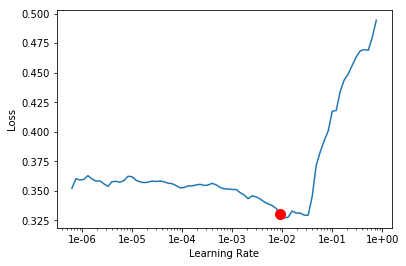

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

11. Ré-entrainez votre modèle 

In [0]:
learn.fit_one_cycle(5, 9.12E-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.312798,0.391772,0.827476,00:00
1,0.305221,0.464946,0.817891,00:00
2,0.265411,0.467920,0.833866,00:00
3,0.221966,0.448844,0.843450,00:00
4,0.182043,0.443200,0.856230,00:00


12. Regardez vos résultats sur une matrice de confusion 

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

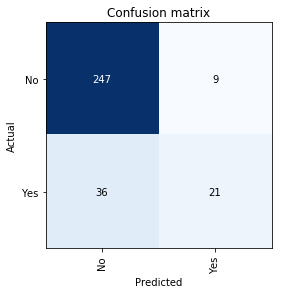

In [0]:
interp.plot_confusion_matrix()

13. Comparez cela à un modèle de Random Forest, que pouvez vous conclure ?

In [0]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [0]:
X  = dataset.loc[:, dataset.columns!="Attrition_Yes"]
y = dataset.loc[:, dataset.columns=="Attrition_Yes"]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8673469387755102